# Task 1 - GRIPMAY'21
## Author - Khushi Agarwal

In [98]:
#importing all the libraries required in this notebook
import numpy as np
import pandas as pd
import seaborn as sns

In [99]:
#reading the data from the link provided
url = "http://bit.ly/w-data"
df = pd.read_csv(url , header = 0)

In [100]:
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


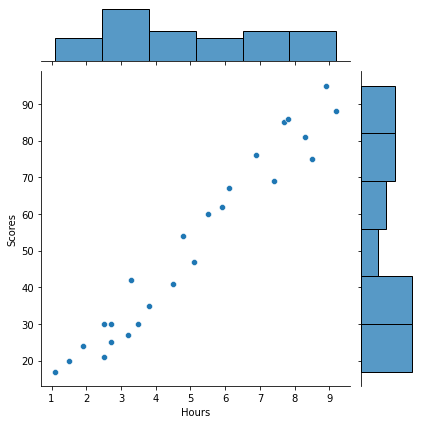

In [101]:
#plotting the graph of distribution of percentage score vs hours of study time
sns.jointplot(x = 'Hours',y = 'Scores' , data = df)

##### From the above graph we can see that there exists an almost positive linear realtion between the number of hours studied and percentage marks scored.

## Preprocessing of the data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [103]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [104]:
x = df[['Hours']]
y = df['Scores']

From the above output we see that there is no missing value and from the graph above we do not see the existence of an outlier.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=0)

In [107]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


We have split our data into training and testing set and now next we will train our algorithm

## Training the algorithm

In [108]:
from sklearn.linear_model import LinearRegression
lm_a = LinearRegression()
lm_a.fit(x_train,y_train)

print("Training Complete.")

Training Complete.


In [109]:
print(lm_a.coef_ , lm_a.intercept_)

[9.91065648] 2.018160041434683


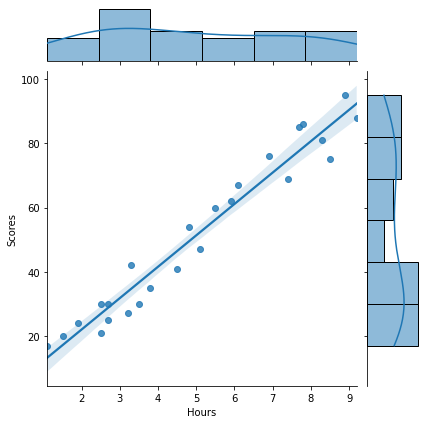

In [110]:
#plotting regression line
sns.jointplot(x = df['Hours'],y= df['Scores'] , data = df , kind = "reg")

## Making prediction

Now that we have trained our algorithm, it's time to make some predictions

In [111]:
print(x_test) #this is the test set data---in hours
y_pred = lm_a.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [112]:
# Comparing Actual vs Predicted
ds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
ds 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the regression score function R^2. There are many such metrics.

In [113]:
from sklearn.metrics import r2_score

In [114]:
r2_score(y_test,y_pred)

0.9454906892105356

we can see the R^2 value to be quite near to 1 which indicates a good model.